PROBLEM STATEMENT :

To classify reviews given by various viewers as a  positive review or a negative review after watching a movie using different classification algorithms  in Machine Learning  and finding the best algorithm.
DATASET LINK : https://drive.google.com/drive/folders/1vZgoh1o5xT6vehsRdfAQEX4nA79yoSVe?usp=sharing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("imdb_dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

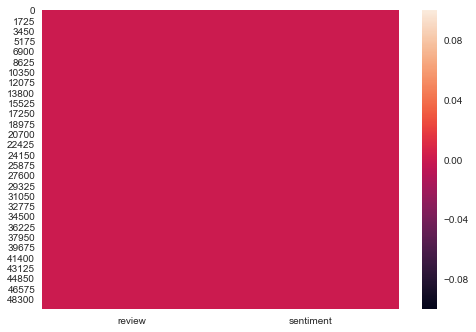

In [95]:
sns.heatmap(data.isnull())

<function matplotlib.pyplot.legend(*args, **kwargs)>

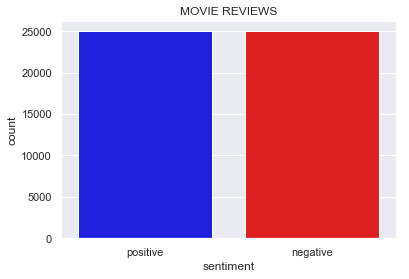

In [21]:
plt.title("MOVIE REVIEWS")
sns.set(style="darkgrid")
sns.countplot(data.sentiment,palette=["blue","red"])
plt.legend

In [22]:
data.shape

(50000, 2)

In [23]:
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [24]:
data['sentiment'].describe()

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.3+ KB


In [26]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [27]:
X = data.review
X.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [28]:
y= data.sentiment
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [29]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)   #(input,output,testsize)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000,)
(40000,)
(10000,)
(10000,)


In [31]:
# COUNT VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer
# creating an object
count_vect = CountVectorizer()

In [32]:
# Generate the word counts for the words in the documents 
word_count_vector = count_vect.fit(X_train)

# to get the feature names
word_count_vector.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00000001',
 '00001',
 '00015',
 '000dm',
 '000s',
 '001',
 '003830',
 '006',
 '0069',
 '007',
 '0079',
 '007s',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00o',
 '00pm',
 '00s',
 '00schneider',
 '01',
 '0126',
 '0148',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '044',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '07b',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0r',
 '0s',
 '0tt',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000000',
 '10000000000000',
 '10000th',
 '1000lb',
 '1000s',
 '1001',
 '1004',
 '100b',
 '100bt',
 '100ft',
 '100ibs',
 '100k',
 '100m',
 '100miles',
 '100min',
 '100mins',
 '100mph',
 '100s',
 '100th',
 '100times',
 '100x',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '106',
 '106min',
 '107',
 '108',
 '1080p',
 '109',
 '10am',
 '10ish',
 '10k',
 '10lines',
 '10mil',
 '10min',
 '10mins',
 '10minutes',
 '10pm',
 '10s',
 '10th',
 '10x',
 '10yo',
 '10yr',
 '10yrs',
 '11',
 '11

In [33]:
#TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
#initialize an object for the tfidf vectorizer
tfidf = TfidfVectorizer()

In [35]:
#apply the tfidf to the data(X_train)

X_train_transformed = tfidf.fit_transform(X_train)
X_train_transformed

<40000x92916 sparse matrix of type '<class 'numpy.float64'>'
	with 5463017 stored elements in Compressed Sparse Row format>

In [36]:
X_test_transformed = tfidf.transform(X_test)
X_test_transformed

<10000x92916 sparse matrix of type '<class 'numpy.float64'>'
	with 1353926 stored elements in Compressed Sparse Row format>

In [37]:
#Feature names
tfidf.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00000001',
 '00001',
 '00015',
 '000dm',
 '000s',
 '001',
 '003830',
 '006',
 '0069',
 '007',
 '0079',
 '007s',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00o',
 '00pm',
 '00s',
 '00schneider',
 '01',
 '0126',
 '0148',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '044',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '07b',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0r',
 '0s',
 '0tt',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000000',
 '10000000000000',
 '10000th',
 '1000lb',
 '1000s',
 '1001',
 '1004',
 '100b',
 '100bt',
 '100ft',
 '100ibs',
 '100k',
 '100m',
 '100miles',
 '100min',
 '100mins',
 '100mph',
 '100s',
 '100th',
 '100times',
 '100x',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '106',
 '106min',
 '107',
 '108',
 '1080p',
 '109',
 '10am',
 '10ish',
 '10k',
 '10lines',
 '10mil',
 '10min',
 '10mins',
 '10minutes',
 '10pm',
 '10s',
 '10th',
 '10x',
 '10yo',
 '10yr',
 '10yrs',
 '11',
 '11

In [38]:
# position of the words
tfidf.vocabulary_

{'there': 82411,
 'is': 42612,
 'an': 3971,
 'excellent': 28243,
 'reason': 66926,
 'edison': 25890,
 'went': 90027,
 'straight': 78734,
 'to': 83270,
 'video': 88387,
 'it': 42740,
 'would': 91448,
 'have': 37220,
 'landed': 46662,
 'in': 40759,
 'theaters': 82306,
 'with': 90990,
 'crumbling': 19627,
 'thud': 82776,
 'the': 82295,
 'movie': 54863,
 'lasted': 46914,
 'entirely': 27252,
 'too': 83534,
 'long': 48746,
 'and': 4084,
 'was': 89543,
 'perilously': 61281,
 'boring': 10600,
 'just': 44174,
 'notch': 57296,
 'above': 1657,
 'lowbrow': 49084,
 'thanks': 82261,
 'freeman': 31996,
 'spacey': 76847,
 'who': 90435,
 'obviously': 57886,
 'had': 36282,
 'spare': 76906,
 'two': 85323,
 'weeks': 89864,
 'before': 8218,
 'their': 82334,
 'next': 56586,
 'films': 30304,
 'bad': 6864,
 'guys': 36107,
 'are': 5148,
 'as': 5575,
 'laughable': 47010,
 'action': 2075,
 'near': 56125,
 'non': 57082,
 'existent': 28443,
 'justin': 44187,
 'timberlake': 83010,
 'acting': 2070,
 'hate': 37134,
 

In [39]:
# Idf of the terms
tfidf.idf_

array([ 6.67667881,  5.72736282, 10.90351255, ..., 10.90351255,
       10.90351255, 10.90351255])

# NAIVE BAYES

In [40]:
# Apply the naive bayes algorithm
from sklearn.naive_bayes import BernoulliNB
#creating an object
model_BernNB = BernoulliNB()

In [41]:
# applying the algorithm to the data
# objectname.fit(input,output)

model_BernNB.fit(X_train_transformed,y_train)

BernoulliNB()

In [96]:
# prediction on train data
# syntax: objectname.predict(input)
y_train_pred1 = model_BernNB.predict(X_train_transformed)

In [97]:
# compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
confusion_matrix(y_train,y_train_pred1)

array([[18552,  1548],
       [ 2516, 17384]], dtype=int64)

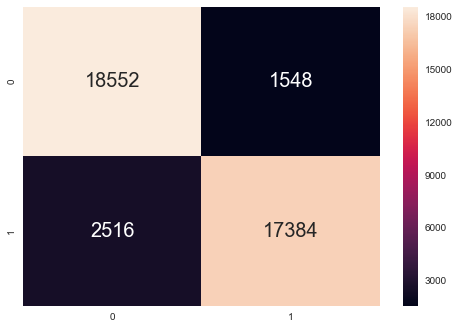

In [98]:
sns.heatmap(confusion_matrix(y_train,y_train_pred1),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [100]:
 print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

    negative       0.88      0.92      0.90     20100
    positive       0.92      0.87      0.90     19900

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



In [101]:
accuracy_score(y_train,y_train_pred1)

0.8984

In [102]:
# prediction on test data
# syntax: objectname.predict(input)
y_test_pred1 = model_BernNB.predict(X_test_transformed)

In [103]:
# compare the actual values(y_test) with predicted values(y_test_pred)

confusion_matrix(y_test,y_test_pred1)

array([[4317,  583],
       [ 841, 4259]], dtype=int64)

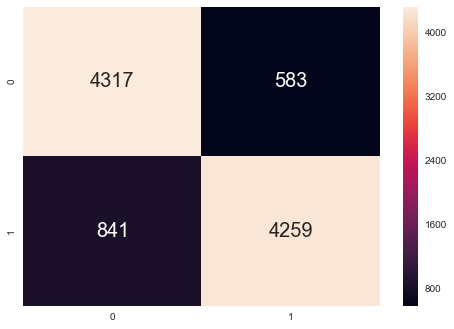

In [104]:
sns.heatmap(confusion_matrix(y_test,y_test_pred1),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [105]:
accuracy_score(y_test,y_test_pred1)

0.8576

In [106]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      4900
    positive       0.88      0.84      0.86      5100

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# LOGISTIC REGRESSION

In [107]:
# build the classifier on training data
#sklearn library: import,instantiate,fit
from sklearn.linear_model import LogisticRegression
max_iter=int
reg = LogisticRegression()
reg.fit(X_train_transformed,y_train)  #input and output will be passed to fit method

LogisticRegression()

In [108]:
#predicting on train data
# syntax : objectname.predict(Input)
y_train_pred2 =reg.predict(X_train_transformed)
y_train_pred2

array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [110]:
# confusion matrix for the training data
# confusion matrix(actual values,predicted values)
from sklearn.metrics import confusion_matrix , accuracy_score
conf = confusion_matrix(y_train,y_train_pred2)
conf

array([[18630,  1470],
       [ 1248, 18652]], dtype=int64)

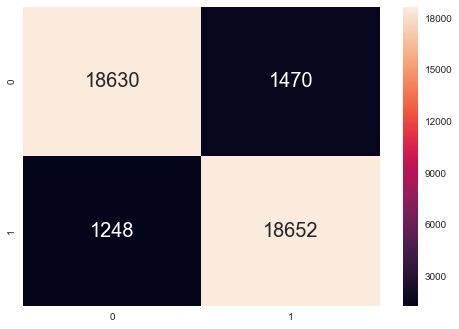

In [111]:
sns.heatmap(confusion_matrix(y_train,y_train_pred2),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred2)

0.93205

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred2)) 

              precision    recall  f1-score   support

    negative       0.94      0.93      0.93     20100
    positive       0.93      0.94      0.93     19900

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



In [114]:
#predicting on testing data
y_test_pred2 =reg.predict(X_test_transformed)
y_test_pred2

array(['positive', 'positive', 'positive', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [115]:
conf = confusion_matrix(y_test,y_test_pred2)
conf

array([[4341,  559],
       [ 468, 4632]], dtype=int64)

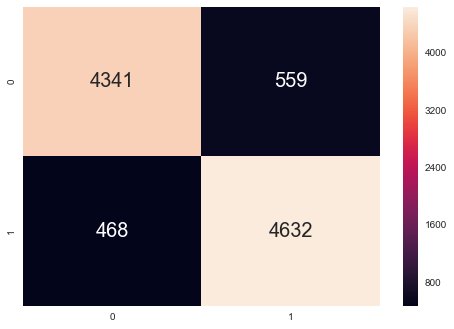

In [116]:
sns.heatmap(confusion_matrix(y_test,y_test_pred2),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [117]:
accuracy_score(y_test,y_test_pred2)

0.8973

In [118]:
print(classification_report(y_test,y_test_pred2)) 

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4900
    positive       0.89      0.91      0.90      5100

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# RANDOM FOREST CLASSIFICATION

In [119]:
#Import, intialize and fit

#Import the RfC from sklearn
from sklearn.ensemble import RandomForestClassifier


#Initilaize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)

#fit the TFC to the dataset
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier(n_estimators=40)

In [120]:
#Prediction on training data
#Syntax: ojectname.predict(InputValues)
y_train_pred3 = rfc.predict(X_train_transformed)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_train_pred3))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     20100
    positive       1.00      1.00      1.00     19900

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



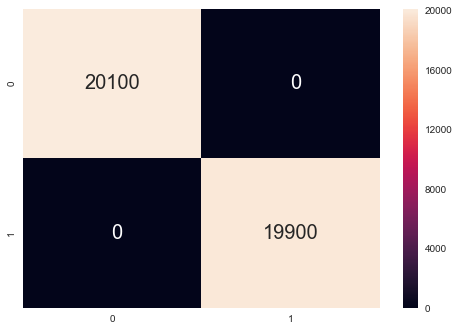

In [121]:
sns.heatmap(confusion_matrix(y_train,y_train_pred3),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [122]:
accuracy_score(y_train,y_train_pred3)

1.0

In [123]:
#Prediction on testing data
y_test_pred3 =rfc.predict(X_test_transformed)
print(classification_report(y_test, y_test_pred3))

              precision    recall  f1-score   support

    negative       0.81      0.84      0.83      4900
    positive       0.84      0.81      0.82      5100

    accuracy                           0.82     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.82      0.82     10000



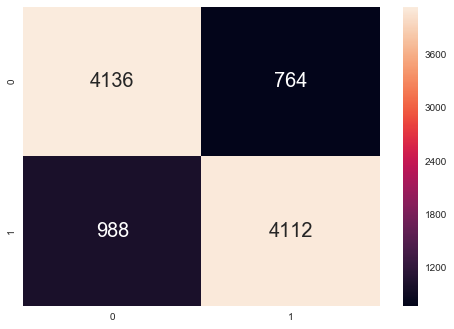

In [124]:
sns.heatmap(confusion_matrix(y_test,y_test_pred3),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [130]:
accuracy_score(y_test,y_test_pred3)

0.8248

# ROC-AUC SCORE FOR ALL THE THREE MODELS:

In [131]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model_BernNB = BernoulliNB()
reg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators = 40)

model_BernNB.fit(X_train_transformed,y_train)
reg.fit(X_train_transformed,y_train)
rfc.fit(X_train_transformed,y_train)

pred_prob1=model_BernNB.predict_proba(X_test_transformed)
pred_prob2=reg.predict_proba(X_test_transformed)
pred_prob3=rfc.predict_proba(X_test_transformed)



In [132]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1,tpr1,thresh1 = roc_curve(y_test_pred,pred_prob1[:,1],pos_label='positive')
fpr2,tpr2,thresh2 = roc_curve(y_test_pred2,pred_prob2[:,1],pos_label='positive')
fpr3,tpr3,thresh3 = roc_curve(y_test_pred3,pred_prob3[:,1],pos_label='positive')



In [133]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_pred,pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_pred2,pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test_pred3,pred_prob3[:,1])

print(auc_score1,auc_score2,auc_score3)

0.9481254537724015 1.0 0.9218622621657224


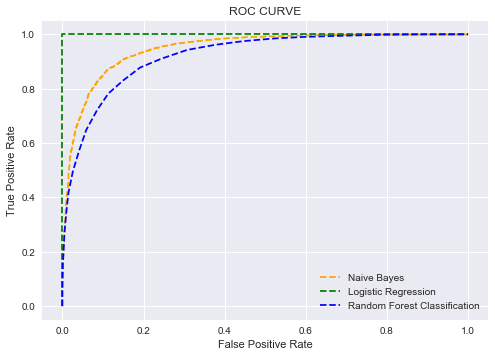

In [134]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#plot roc curves
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Naive Bayes')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='Logistic Regression')
plt.plot(fpr3,tpr3,linestyle='--',color='blue',label='Random Forest Classification')


#title
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

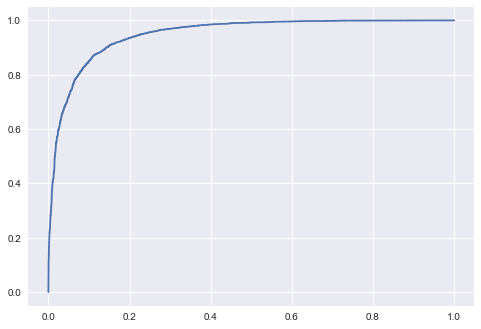

In [135]:
plt.plot(fpr1,tpr1)

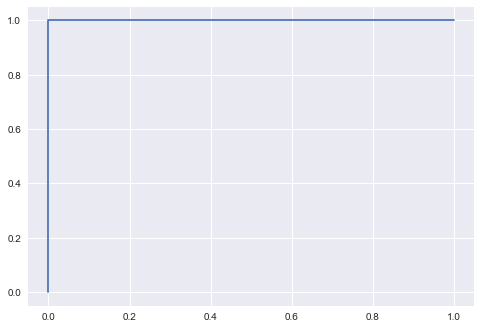

In [136]:
plt.plot(fpr2,tpr2)

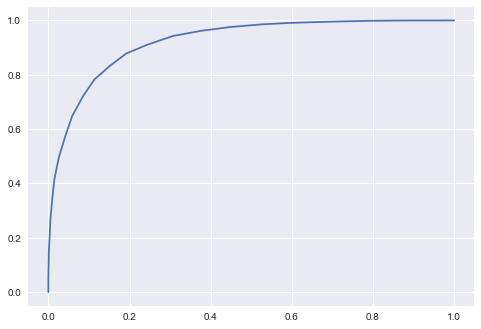

In [137]:
plt.plot(fpr3,tpr3)